<img src = "https://www.bits-pilani.ac.in/wp-content/uploads/bits-pillani-2-1.png">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation<br>
</center></h1>

<h2><center>Assignment -Python – PS1 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>Submit only the .IPYNB file. Intermediate files to be attached as mentioned in (2).</li>
  <li>All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready. Most effective visuals would fetch maximum  credits</li>
  <li>Submissions done via means other than CANAVAS will strictly be NOT graded.</li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: (mention your group number here)</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Deepak Kajla</td>
    <td>2023cs04003</td>
  </tr>
  <tr>
    <td>Harsha K</td>
    <td>2023cs04018</td>
  </tr>
  <tr>
    <td>Sahitya Srinivasan</td>
    <td>2023cs04028</td>
  </tr>
  <tr>
    <td>Santhosh Bhat</td>
    <td>2023cs04041</td>
  </tr>
</table>

<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>




##  Download and Prep the Data: 1 Marks

<h4>Import the libraries needed</h4>

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<h4> Load data and store in dataframe </h4>

In [286]:
# Load the dataframe from a CSV file
# We used the Housing dataset for this assignment which is attached for reference.
df = pd.read_csv('../dataSetFull.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8129 non-null   object 
 1   price_tnd            6421 non-null   float64
 2   price_eur            6421 non-null   float64
 3   location             8129 non-null   object 
 4   city                 6813 non-null   object 
 5   governorate          8129 non-null   object 
 6   Area                 7944 non-null   float64
 7   pieces               6940 non-null   float64
 8   room                 7720 non-null   float64
 9   bathroom             7470 non-null   float64
 10  age                  3984 non-null   object 
 11  state                7029 non-null   float64
 12  latt                 8094 non-null   float64
 13  long                 8094 non-null   float64
 14  distance_to_capital  8094 non-null   float64
 15  garage               8129 non-null   i

<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [287]:
### Data Exploration Functions ###

# Get the number of rows and columns in the data set
def display_dataframe_shape(df):
    rows, columns = df.shape
    print("There are {} rows and {} columns in the data set".format(rows, columns))

In [288]:
# Explore the data set variables

# Display the first 5 rows of the dataframe
display(df.head())

,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,age,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,b9e1c759-d149-46e8-9765-d8c198a13ff0,NaN,NaN,Cité El Bassatine Ancien,Boumhel Bassatine,Ben Arous,NaN,27.0,8.0,NaN,NaN,NaN,36.577240,10.34246,30.815266,0,0,0,0,0,0,0,0,0,0,0
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,30-50,1.0,35.898175,10.58025,108.792932,1,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,NaN,1.0,35.827291,10.63390,118.317747,0,0,0,0,0,0,0,1,1,1,1
3,032f818f-1b38-4d1a-a000-753e235ccf54,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,NaN,NaN,NaN,35.827300,10.63390,118.316886,0,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,NaN,1.0,35.827300,10.63390,118.316886,0,0,0,0,0,0,0,1,1,1,1


In [289]:

# Display the last 5 rows of the dataframe
display(df.tail())


,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,age,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
8124,d6533c0a-666a-4fe4-8c20-6a97561bfb24,NaN,NaN,Sahloul,Sousse Ville,Sousse,NaN,NaN,2.0,2.0,0,2.0,35.830000,10.620000,117.401561,1,0,0,0,0,0,1,0,1,1,1
8125,3c3ac15d-12a9-46bb-9227-8c2c98de4007,NaN,NaN,El Kantaoui,Hammam Sousse,Sousse,NaN,NaN,NaN,NaN,NaN,NaN,35.856900,10.597200,113.681036,0,0,0,0,0,1,1,0,0,0,0
8126,d3b30b43-9377-45c1-8e22-626f11a29638,NaN,NaN,Carthage,Carthage,tunis,NaN,NaN,NaN,3.0,NaN,NaN,36.869432,10.316405,16.505765,1,0,0,0,0,0,1,0,0,1,1
8127,a970dfc9-4d39-4d7e-bd10-0fdcfc27ab04,NaN,NaN,La Marsa,NaN,tunis,NaN,NaN,NaN,1.0,NaN,NaN,36.876389,10.325278,17.722190,0,0,0,0,0,0,0,0,0,0,0
8128,a9ee278d-7e1c-4e2c-a3f3-d54c40ca2772,NaN,NaN,Les Berges Du Lac 2,La Marsa,tunis,NaN,NaN,3.0,NaN,NaN,2.0,36.847471,10.270151,10.829218,0,0,0,0,0,1,0,0,0,0,0


In [290]:

# Display the shape of the dataframe
display_dataframe_shape(df)

# Display the data types of each column
display(df.dtypes)


There are 8129 rows and 26 columns in the data set


id                      object
price_tnd              float64
price_eur              float64
location                object
city                    object
governorate             object
Area                   float64
pieces                 float64
room                   float64
bathroom               float64
age                     object
state                  float64
latt                   float64
long                   float64
distance_to_capital    float64
garage                   int64
garden                   int64
concierge                int64
beach_view               int64
mountain_view            int64
pool                     int64
elevator                 int64
furnished                int64
equipped_kitchen         int64
central_heating          int64
air_conditioning         int64
dtype: object

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Fill the missing value for the continous variables with Mean(average) for proper data visualization
<br><br>
    Preprocess height - convert data in  format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical
<br><br>    
    Preprocess weight - convert data in  format xxlbs to xx Remove "nan" with Mode and convert the column to numerical
<h4>Do Univariate anlaysis for outliers detection for height and weight
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [291]:
#determine the numerical features and describe them
df.describe()

,price_tnd,price_eur,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,6.421000e+03,6.421000e+03,7944.000000,6940.000000,7720.000000,7470.000000,7029.000000,8094.000000,8094.000000,8094.000000,8129.000000,8129.0,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000
mean,6.812867e+05,2.112588e+05,369.742951,4.318300,3.325389,1.997724,1.386826,36.421537,10.396046,65.495742,0.471276,0.0,0.245295,0.104072,0.082544,0.231886,0.262271,0.048099,0.568582,0.558248,0.550129
std,8.825321e+05,2.737262e+05,955.113560,2.270759,2.020898,1.237548,0.574206,1.144072,0.409603,126.346464,0.499205,0.0,0.430288,0.305373,0.275209,0.422062,0.439896,0.213989,0.495305,0.496626,0.497511
min,6.500000e+03,2.015000e+03,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.428052,0.003560,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+05,8.060000e+04,117.000000,3.000000,2.000000,1.000000,1.000000,36.401080,10.195560,11.345082,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,1.302000e+05,178.000000,4.000000,3.000000,2.000000,1.000000,36.818810,10.325278,17.722190,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.800000e+05,2.418000e+05,371.000000,5.000000,4.000000,2.000000,2.000000,36.876389,10.614570,72.825068,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.900000e+07,5.890000e+06,22000.000000,27.000000,50.000000,20.000000,2.000000,40.565098,11.331493,4224.947771,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [292]:
# Drop garden as all records have only single value
df.drop('garden', axis=1, inplace=True)

In [293]:
df.describe().columns

Index(['price_tnd', 'price_eur', 'Area', 'pieces', 'room', 'bathroom', 'state',
       'latt', 'long', 'distance_to_capital', 'garage', 'concierge',
       'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished',
       'equipped_kitchen', 'central_heating', 'air_conditioning'],
      dtype='object')

In [294]:
#leftover features are categorical
categorical_cols = df.columns.difference(df.describe().columns).to_list()
print(categorical_cols)
for col in categorical_cols:
    counts = df[col].value_counts(dropna=False).reset_index()
    counts.columns = [col, "count"]
    percentages = df[col].value_counts(dropna=False, normalize=True).reset_index()
    percentages.columns = [col, "proportion"]
    result = counts.merge(percentages, on=col)
    result["proportion"] = result["proportion"].apply(lambda x: x * 100)
    print(f"{col}: Top 5 and bottom 5 records")
    print(pd.concat([result.head(5), result.tail(5)]).drop_duplicates())
    print("\n")

['age', 'city', 'governorate', 'id', 'location']
age: Top 5 and bottom 5 records
             age  count  proportion
0            NaN   4145   50.990282
1              0   1471   18.095707
2           1-5     826   10.161151
3          5-10     671    8.254398
4         10-20     557    6.852011
6          10,20    124    1.525403
7         30-50     104    1.279370
8         50-70      22    0.270636
9   Plus de 100       9    0.110715
10       70-100       7    0.086111


city: Top 5 and bottom 5 records
                city  count  proportion
0                NaN   1316   16.188953
1           La Marsa   1095   13.470292
2           Hammamet   1093   13.445688
3          La Soukra    628    7.725427
4       Ariana Ville    553    6.802805
66              Douz      2    0.024603
67      Borj El Amri      1    0.012302
68  Kalaat Landalous      1    0.012302
69          Tebourba      1    0.012302
70         El Battan      1    0.012302


governorate: Top 5 and bottom 5 records
     g

In [295]:
# Delete "id" columns as its unique for each row and does not provide any useful information
df.drop('id', axis=1, inplace=True)
categorical_cols.remove('id')

In [296]:
df.columns
categorical_cols

['age', 'city', 'governorate', 'location']

In [297]:
categorical_cols = ['location','city','governorate']
ordinal_cols = ['age']
numerical_cols = df.describe().columns.to_list()
print(categorical_cols)
print(ordinal_cols)
print(numerical_cols)

['location', 'city', 'governorate']
['age']
['price_tnd', 'price_eur', 'Area', 'pieces', 'room', 'bathroom', 'state', 'latt', 'long', 'distance_to_capital', 'garage', 'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen', 'central_heating', 'air_conditioning']


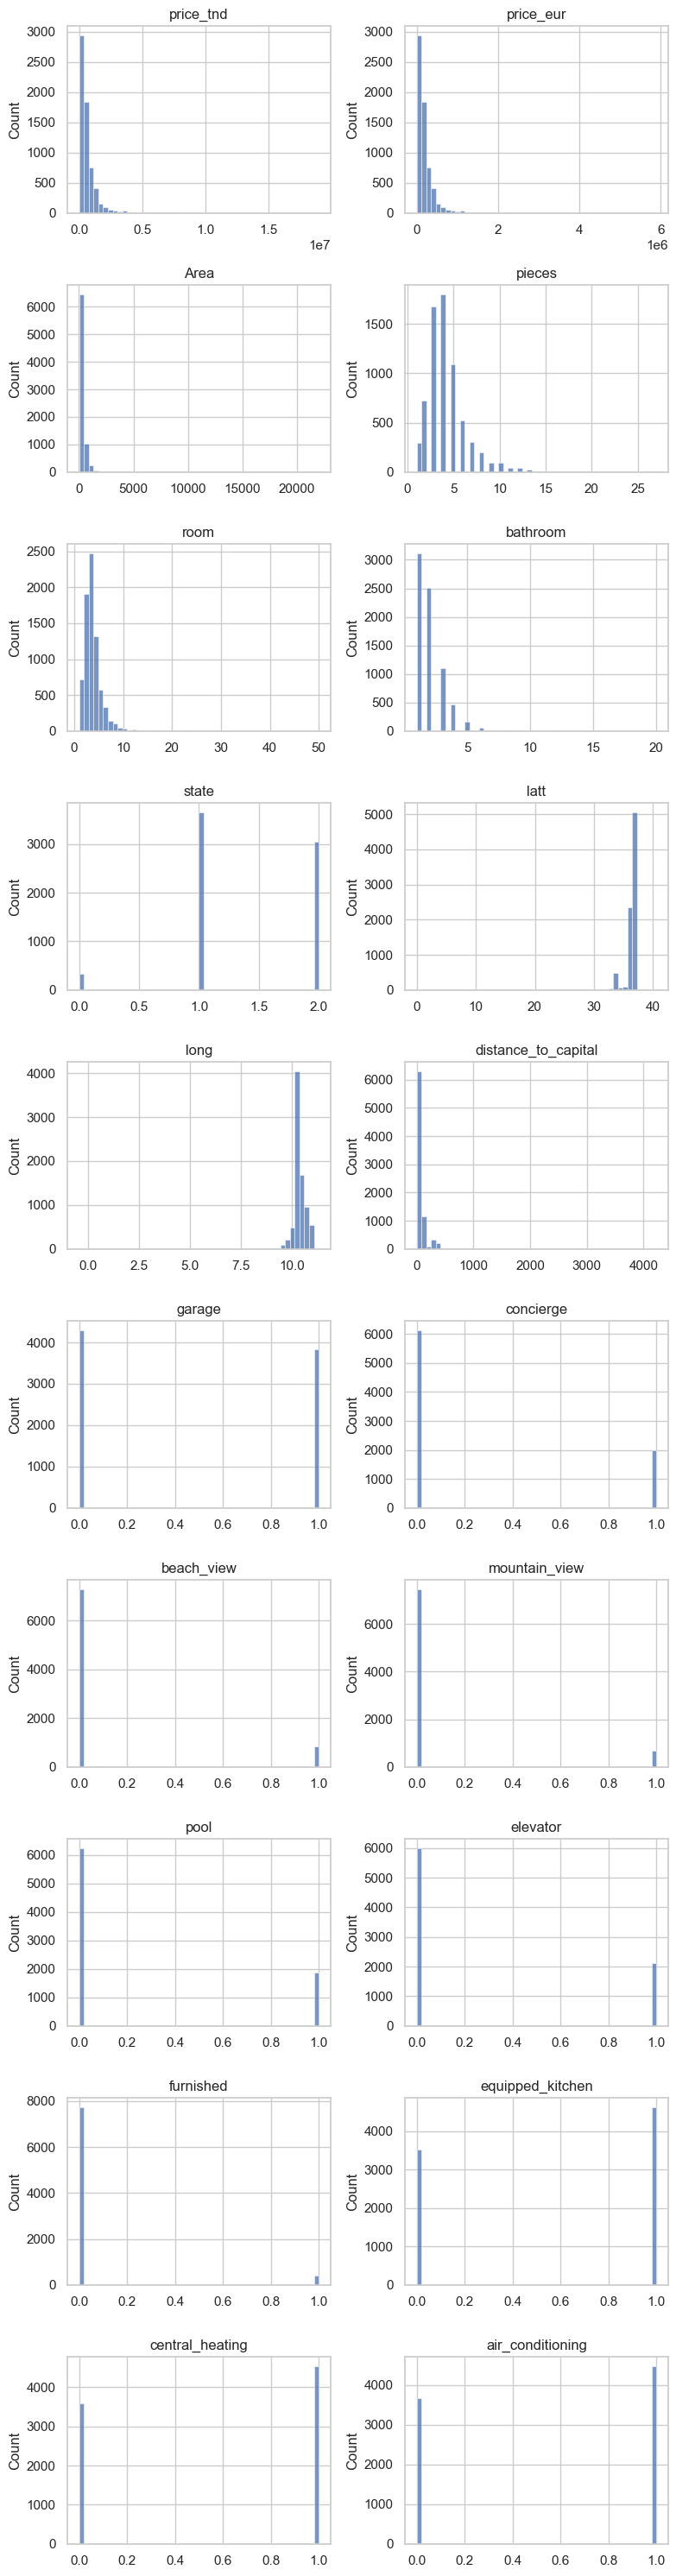

In [298]:
# visualize distribution of numerical columns
fig, ax = plt.subplots(int(np.ceil(len(numerical_cols)/2)), 2, figsize=(8, 30))
ax = ax.flatten()

# Iterate over the numerical columns and corresponding axes
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')

# Remove any empty subplots (if number of subplots is more than columns)
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
fig.show()

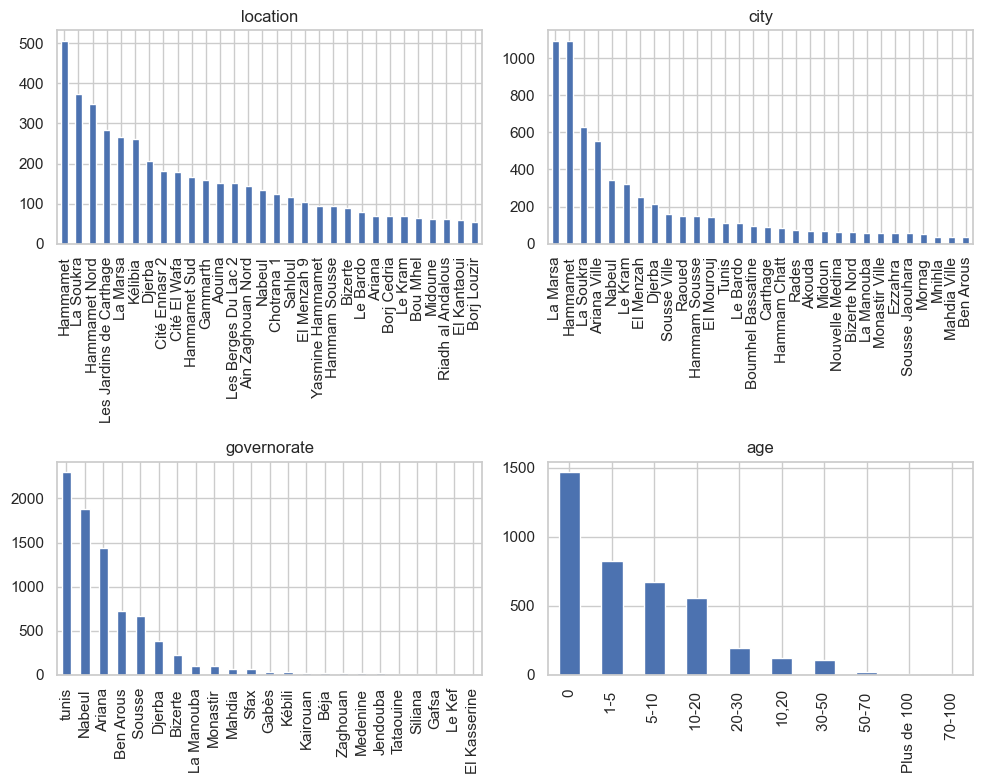

In [299]:
# visualize distribution of nominal and ordinal categorical columns
display_cols = categorical_cols + ordinal_cols
fig, ax = plt.subplots(int(np.ceil(len(display_cols)/2)), 2, figsize=(10, 8))
ax = ax.flatten()

# Iterate over the numerical columns and corresponding axes
for i, col in enumerate(display_cols):
    df[col].value_counts().sort_values(ascending=False).head(30).plot(kind='bar', ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')

# Remove any empty subplots (if number of subplots is more than columns)
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
fig.show()

In [300]:
### Data Preprocessing ###

# Drop duplicates
df.drop_duplicates(inplace=True)
display_dataframe_shape(df)


There are 7971 rows and 24 columns in the data set


In [301]:
### Data Cleaning ###

# Strip the leading and trailing whitespaces from the columns
# also convert to lower case for uniformity
df = df.map(lambda x: x.strip().lower() if isinstance(x, str) else x)
df.head()


,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,age,state,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,NaN,NaN,cité el bassatine ancien,boumhel bassatine,ben arous,NaN,27.0,8.0,NaN,NaN,NaN,36.577240,10.34246,30.815266,0,0,0,0,0,0,0,0,0,0
1,3250000.0,1007500.0,el kantaoui,hammam sousse,sousse,1000.0,26.0,16.0,14.0,30-50,1.0,35.898175,10.58025,108.792932,1,1,1,0,0,1,1,1,1,1
2,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,10.0,NaN,1.0,35.827291,10.63390,118.317747,0,0,0,0,0,0,1,1,1,1
3,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,NaN,NaN,NaN,35.827300,10.63390,118.316886,0,0,0,0,0,0,1,1,1,1
4,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,10.0,NaN,1.0,35.827300,10.63390,118.316886,0,0,0,0,0,0,1,1,1,1


In [302]:
# We can convert the ordinal value to numerical based on the mean of the ranges
# This is better than simple substitution with numbers as it retains more of the original information
print("\nage:")
unique_values = df['age'].unique()
mean_map = {
    '0': 0,
    '1-5': 3,
    '5-10': 7.5,
    '10-20': 15,
    '10,20': 15,
    '20-30': 25,
    '30-50': 40,
    '50-70': 60,
    '70-100': 85,
    'plus de 100': 100
}
print("Before conversion: ", unique_values)
df['mean_age'] = df['age'].map(mean_map)
unique_values = df['mean_age'].unique()
print("After conversion: ", unique_values)
df.drop('age', axis=1, inplace=True)
numerical_cols.append('mean_age')
df.head()


age:
Before conversion:  [nan '30-50' '1-5' '0' '5-10' '10-20' '20-30' '70-100' '10,20'
 'plus de 100' '50-70']
After conversion:  [  nan  40.    3.    0.    7.5  15.   25.   85.  100.   60. ]


,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning,mean_age
0,NaN,NaN,cité el bassatine ancien,boumhel bassatine,ben arous,NaN,27.0,8.0,NaN,NaN,36.577240,10.34246,30.815266,0,0,0,0,0,0,0,0,0,0,NaN
1,3250000.0,1007500.0,el kantaoui,hammam sousse,sousse,1000.0,26.0,16.0,14.0,1.0,35.898175,10.58025,108.792932,1,1,1,0,0,1,1,1,1,1,40.0
2,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,10.0,1.0,35.827291,10.63390,118.317747,0,0,0,0,0,0,1,1,1,1,NaN
3,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,NaN,NaN,35.827300,10.63390,118.316886,0,0,0,0,0,0,1,1,1,1,NaN
4,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,10.0,1.0,35.827300,10.63390,118.316886,0,0,0,0,0,0,1,1,1,1,NaN


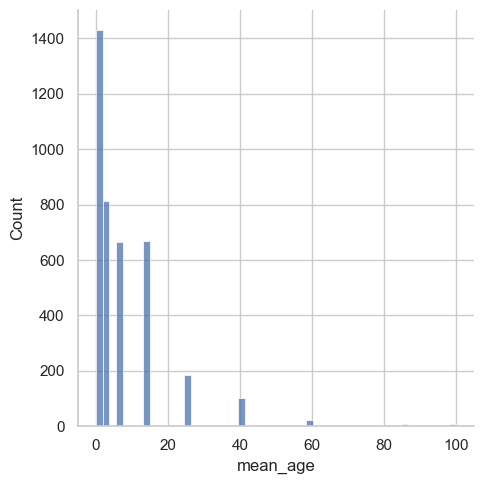

In [303]:
sns.displot(df['mean_age'])

In [304]:
# Check for missing values
display(df.isna().sum())

price_tnd              1668
price_eur              1668
location                  0
city                   1229
governorate               0
Area                    177
pieces                 1154
room                    406
bathroom                650
state                  1086
latt                     35
long                     35
distance_to_capital      35
garage                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
mean_age               4067
dtype: int64

In [305]:
# Filling missing values: city column

before_processing = df['city'].isna().sum()
print("Initial number of missing values in city column: ", before_processing)

# Fetch all the location in each city, to fill missing values of city column more meaningfully.
location_city = {}
for local in df['location'].dropna().unique():
    d1 = df[df['location'] == local]['city'].dropna()
    if len(d1) > 0:
        location_city[local] = d1.mode()[0]

# Fill missing values in city column using location column
df.loc[df['city'].isna(), 'city'] = df[df['city'].isna()]['location'].map(location_city)

nan_values = df['city'].isna().sum()
filled_values = before_processing - nan_values

print("Number of city records filled smartly: ", filled_values)
print("Number of city records remaining which are still empty (will be removed): ", nan_values)

# Remove city records if the location is not available
df.dropna(subset=['city'], inplace=True)


Initial number of missing values in city column:  1229
Number of city records filled smartly:  404
Number of city records remaining which are still empty (will be removed):  825


In [306]:
# Filling missing values: latt, long, distance_to_capital

cols = ['latt', 'long', 'distance_to_capital']

for col in cols:
    before_processing = df['city'].isna().sum()
    if before_processing > 0:
        print(f"\nInitial number of missing values in {col} column: ", before_processing)

        # Fetch all the location in each city, to fill missing values of city column more meaningfully.
        location_map = {}
        for local in df['location'].dropna().unique():
            d1 = df[df['location'] == local][col].dropna()
            if len(d1) > 0:
                location_map[local] = d1.median()

        # Fill missing values in city column using location column
        df.loc[df[col].isna(), col] = df[df[col].isna()]['location'].map(location_map)

        nan_values = df[col].isna().sum()
        filled_values = before_processing - nan_values

        print(f"Number of {col} records filled smartly: ", filled_values)
        print(f"Number of {col} records remaining which are still empty (will be removed): ", nan_values)

        # Remove city records if the location is not available
        df.dropna(subset=[col], inplace=True)
    else:
        print(f"\nNo missing values in {col} column")


No missing values in latt column

No missing values in long column

No missing values in distance_to_capital column


In [307]:
# price is target, so we drop na values
df.dropna(subset=['price_eur'], inplace=True)
df.shape

(5689, 24)

In [308]:
# Filling remaining numerical values with median

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
# Check for missing values
display(df.isna().sum())

price_tnd              0
price_eur              0
location               0
city                   0
governorate            0
Area                   0
pieces                 0
room                   0
bathroom               0
state                  0
latt                   0
long                   0
distance_to_capital    0
garage                 0
concierge              0
beach_view             0
mountain_view          0
pool                   0
elevator               0
furnished              0
equipped_kitchen       0
central_heating        0
air_conditioning       0
mean_age               0
dtype: int64

In [309]:
print("Total number of records before final duplicates removal: ", df.shape[0])

# Drop duplicates if any after filling missing values
df.drop_duplicates(inplace=True)

print("Total number of records after final duplicates removal: ", df.shape[0])

# Check for missing values after filling and converting
display(df.info())


Total number of records before final duplicates removal:  5689
Total number of records after final duplicates removal:  5688
<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 1 to 8104
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price_tnd            5688 non-null   float64
 1   price_eur            5688 non-null   float64
 2   location             5688 non-null   object 
 3   city                 5688 non-null   object 
 4   governorate          5688 non-null   object 
 5   Area                 5688 non-null   float64
 6   pieces               5688 non-null   float64
 7   room                 5688 non-null   float64
 8   bathroom             5688 non-null   float64
 9   state                5688 non-null   float64
 10  latt                 5688 non-null   float64
 11  long                 5688 non-null   float64
 12  distance_to_capital  5688 non-null   float64
 13  garage            

None

In [310]:
# checking numerical columns for outliers using boxplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig = make_subplots(rows=int(np.ceil(len(numerical_cols)/2)), cols=2)

for col in numerical_cols:
    r_num = int(numerical_cols.index(col)/2) + 1
    c_num = int(numerical_cols.index(col)%2) + 1
    fig.add_trace(go.Box(y=df[col], name=col), row=r_num, col=c_num)
fig.update_layout(height=3200, width=900)
fig.show()

In [311]:
# Function to replace outliers with the median
def replace_outliers_with_median(column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bound for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the median
    median = column.median()
    
    # Replace outliers with the median
    return column.apply(lambda x: median if x < lower_bound or x > upper_bound else x)


In [312]:
outlier_cols = [
 'latt',
 'long',
 'distance_to_capital']

df[outlier_cols] = df[outlier_cols].apply(replace_outliers_with_median)
df.head()

,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning,mean_age
1,3250000.0,1007500.0,el kantaoui,hammam sousse,sousse,1000.0,26.0,16.0,14.0,1.0,35.898175,10.58025,108.792932,1,1,1,0,0,1,1,1,1,1,40.0
2,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,10.0,1.0,35.827291,10.63390,118.317747,0,0,0,0,0,0,1,1,1,1,3.0
3,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,2.0,1.0,35.827300,10.63390,118.316886,0,0,0,0,0,0,1,1,1,1,3.0
4,2000000.0,620000.0,sousse corniche,sousse ville,sousse,932.0,24.0,24.0,10.0,1.0,35.827300,10.63390,118.316886,0,0,0,0,0,0,1,1,1,1,3.0
5,1000000.0,310000.0,sousse riadh,sousse riadh,sousse,1000.0,23.0,16.0,9.0,2.0,35.814330,10.63392,119.603211,1,0,0,0,0,0,0,0,0,0,3.0


### Question 2
<h4>Do Bi-Variate anlaysis for outliers detection for height and weight 
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [313]:
print("categorical columns:", categorical_cols)
print("numerical columns:", numerical_cols)

categorical columns: ['location', 'city', 'governorate']
numerical columns: ['price_tnd', 'price_eur', 'Area', 'pieces', 'room', 'bathroom', 'state', 'latt', 'long', 'distance_to_capital', 'garage', 'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen', 'central_heating', 'air_conditioning', 'mean_age']


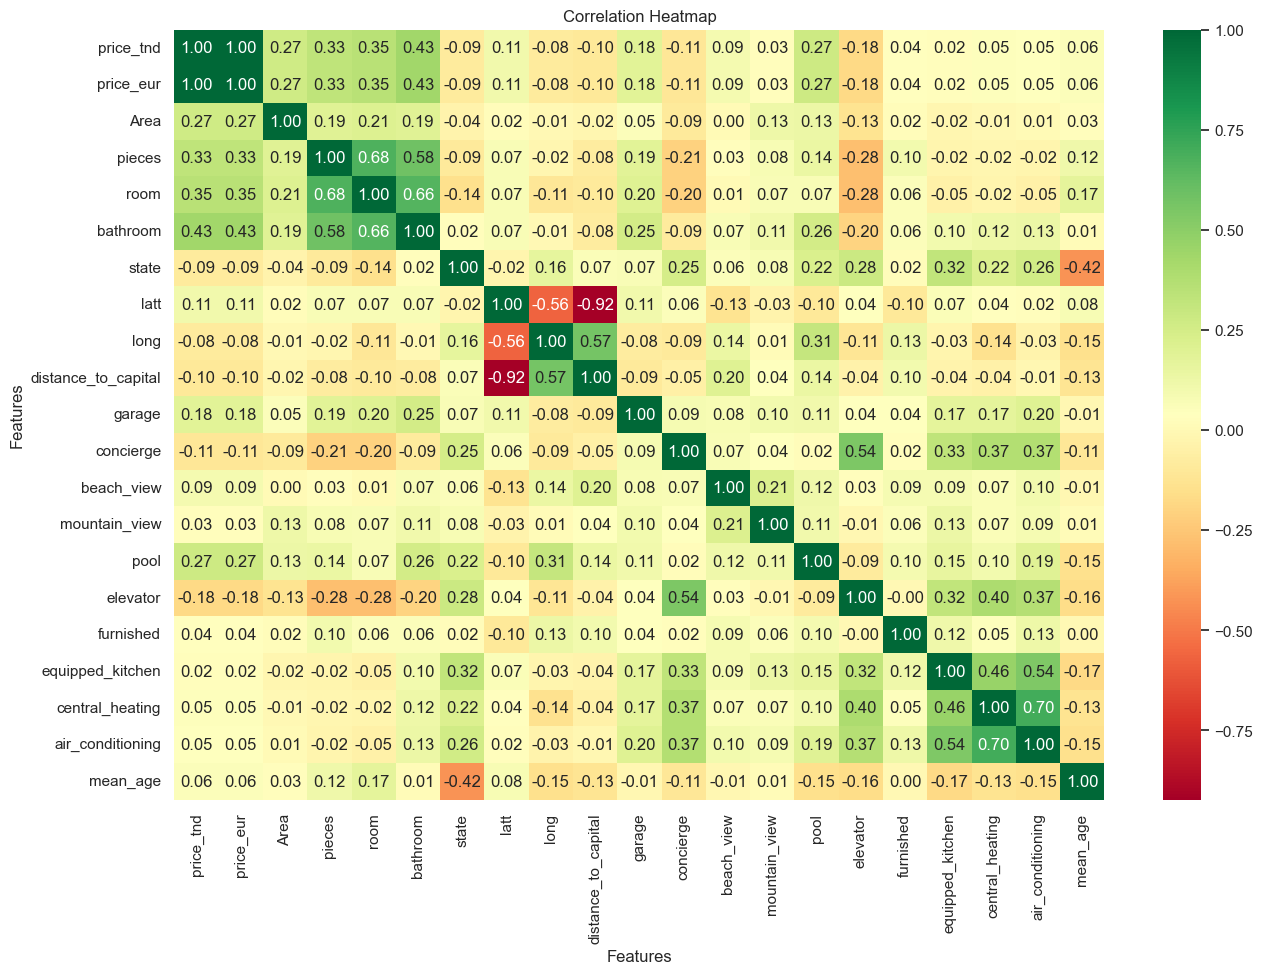

In [314]:
# test for correlation between numerical columns
plt.figure(figsize=(15, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [315]:
# price_tnd and price_eur are correlated
df.drop('price_tnd', axis=1, inplace=True)
# latt is inversely correlated to distance_to_capital
df.drop('latt', axis=1, inplace=True)
# room and bathroom are correlated
df.drop('bathroom', axis=1, inplace=True)
# air_conditioning and central_heating are correlated
df.drop('air_conditioning', axis=1, inplace=True)
numerical_cols.remove('price_tnd')
numerical_cols.remove('latt')
numerical_cols.remove('bathroom')
numerical_cols.remove('air_conditioning')

In [316]:
# test for correlation between categorical columns
from scipy.stats import chi2_contingency

results = []

# Iterate over all combinations of categorical columns
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        cat_col1 = categorical_cols[i]
        cat_col2 = categorical_cols[j]
        
        # Create a contingency table
        contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
        
        # Perform the Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Store the results
        result = {
            "categorical_1": cat_col1,
            "categorical_2": cat_col2,
            "chi2": chi2,
            "p_value": p_value,
            "degrees_of_freedom": dof
        }
        results.append(result)

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)


  categorical_1 categorical_2           chi2  p_value  degrees_of_freedom
0      location          city  369344.305084      0.0               20636
1      location   governorate   81001.081002      0.0                4928
2          city   governorate   82042.918608      0.0                1072


In [317]:
# city, location and governorate are highly correlated (p < 0.05)
df.drop(['city', 'governorate'], axis=1, inplace=True)
categorical_cols.remove('city')
categorical_cols.remove('governorate')

In [318]:
# test for correlation between categorical and numerical columns
from scipy.stats import f_oneway

results = []

# Iterate over all combinations of categorical and numerical columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        
        # Perform ANOVA
        groups = [df[num_col][df[cat_col] == cat] for cat in df[cat_col].unique()]
        f_statistic, p_value = f_oneway(*groups)
        
        result = {
            "categorical": cat_col,
            "numerical": num_col,
            "F-statistic": f_statistic,
            "p_value": p_value
        }
        results.append(result)

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

   categorical            numerical  F-statistic        p_value
0     location            price_eur     6.286032  9.016327e-191
1     location                 Area    10.569026   0.000000e+00
2     location               pieces     2.702400   7.964501e-45
3     location                 room     4.276339  3.483282e-107
4     location                state     5.181974  7.973623e-145
5     location                 long   480.254814   0.000000e+00
6     location  distance_to_capital   559.374609   0.000000e+00
7     location               garage     2.079821   1.968504e-23
8     location            concierge     3.981165   4.729040e-95
9     location           beach_view     3.727408   1.006256e-84
10    location        mountain_view     3.144282   1.490370e-61
11    location                 pool     6.423087  1.919545e-196
12    location             elevator     6.211928  1.061153e-187
13    location            furnished     2.023864   1.077187e-21
14    location     equipped_kitchen     

In [319]:
# Remove location as it is highly correlated to all numerical columns
df.drop('location', axis=1, inplace=True)

In [320]:
display_dataframe_shape(df)
df.drop_duplicates(inplace=True)
display_dataframe_shape(df)

There are 5688 rows and 17 columns in the data set
There are 5678 rows and 17 columns in the data set


### Question 3
<h4>What kind of co-relation exists between Area and number of rooms
<br><br>    
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

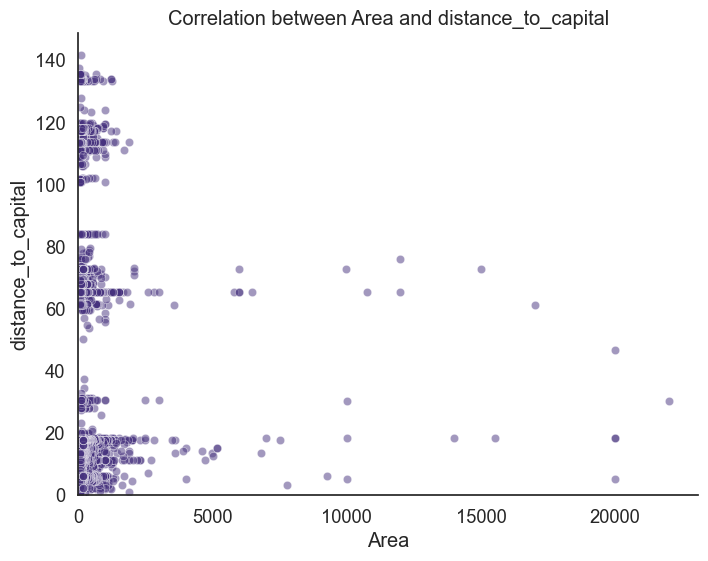

In [327]:
# Scatter plot

fig, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation between Area and distance_to_capital')
sns.scatterplot(data=df, x="Area", y="distance_to_capital", ax=ax, alpha=0.5)
sns.set(style="white", context="notebook", palette="viridis", font_scale=1.2)
sns.despine()
# Set axis limits to include the origin (0,0)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.show()

### Interpretations:
1. Summarise your findings from the visual
    - All of the bigger Area housing locations are within 80 miles distance from its capital.
    - More than one-third of total smaller Area housing locations are within 40 miles distance from its capital.
    - More than 90% of the housing records has the Area less than 5000 square units.
2. The reason for selecting the chart type you did
    - We need to visualise two quantitative feature namely, 'Area' & 'distance_to_capital'.
    - Scatterplot is one of the best way to represent for this purpose.
3. Mention the pre-attentive attributes used.(atleast 2)
    - Visual variable color gradient is used to represent density of data variable records.
    - Visual variable position is used to represent (Area, distance_to_capital) data variable.
4. Mention the gestalt principles used.(atleast 2)
    - Gestalt Law of Proximity - 3 separate groups (0-40, 60-80, 100-140) can be visualised in the visual.
    - Gestalt Law of Closure - Although there is no frame around the plot, the axis lines and the labels are enough to define a closed space.

  ### Question 4
<h4>What kind of relation exists between Age and (potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

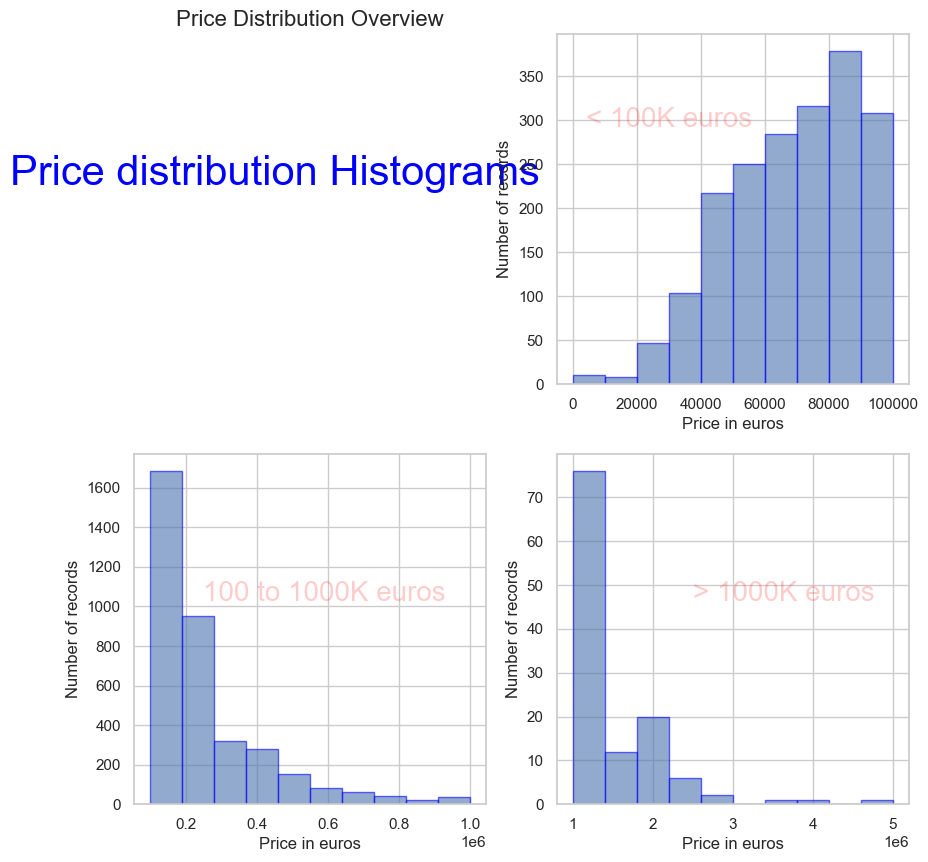

In [322]:
# Histogram:

fig = plt.figure(figsize=(10, 10))

# Subplot 1
ax0 = fig.add_subplot(221)
ax0.set_title('Price Distribution Overview', fontsize=16)

ax0.text(0.4, 0.6, 'Price distribution Histograms',
         fontsize=30,
         color='blue',
         ha='center',
         va='center',
         wrap=True,
         alpha=1)
# Remove borders
for spine in ax0.spines.values():
    spine.set_visible(False)
# Remove x and y ticks
ax0.set_xticks([])
ax0.set_yticks([])

# Subplot 2
ax1 = fig.add_subplot(222)
ax1.hist(df['price_eur'],
         edgecolor='blue',
         bins=10,
         range=(0, 100000),
         alpha=0.6)
ax1.text(30000, 300, '< 100K euros',
         fontsize=20,
         color='red',
         ha='center',
         va='center',
         alpha=0.2)
ax1.set_xlabel('Price in euros', size=12)
ax1.set_ylabel('Number of records', size=12)

# Subplot 3
ax2 = fig.add_subplot(223)
ax2.hist(df['price_eur'],
         edgecolor='blue',
         bins=10,
         range=(100000, 1000000),
         alpha=0.6)
ax2.text(250000, 1000, '100 to 1000K euros',
         fontsize=20,
         color='red',
         ha='left',
         va='bottom',
         alpha=0.2)
ax2.set_xlabel('Price in euros', size=12)
ax2.set_ylabel('Number of records', size=12)

# Subplot 4
ax3 = fig.add_subplot(224)
ax3.hist(df['price_eur'],
         edgecolor='blue',
         bins=10,
         range=(1000000, 5000000),
         alpha=0.6)
ax3.text(2500000, 45, '> 1000K euros',
         fontsize=20,
         color='red',
         ha='left',
         va='bottom',
         alpha=0.2)
ax3.set_xlabel('Price in euros', size=12)
ax3.set_ylabel('Number of records', size=12)

plt.show()

  ### Question 5
<h4>What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>